# Loading data

In [12]:
import pandas as pd

In [13]:
path_features = 'data/training_set_features.csv'
path_targets = 'data/training_set_labels.csv'

In [14]:
df_fts = pd.read_csv(path_features, index_col = 'respondent_id')
df_tgs = pd.read_csv(path_targets, index_col = 'respondent_id')

In [15]:
df = df_tgs.merge(df_fts, on = 'respondent_id', indicator = True)

## Sanity check after merging

- .merge(indicator = True)
- df['merge'].value_counts()
- merge how = 'inner'
- all both 26707
- It indicates one to one data relation

In [16]:
df['_merge'].value_counts()

_merge
both          26707
left_only         0
right_only        0
Name: count, dtype: int64

In [17]:
df_1 = df[['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds','h1n1_vaccine']]

In [18]:
df_1['h1n1_concern'].value_counts()

h1n1_concern
2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: count, dtype: int64

In [9]:
df['employment_occupation'].value_counts()

employment_occupation
xtkaffoo    1778
mxkfnird    1509
emcorrxb    1270
cmhcxjea    1247
xgwztkwe    1082
hfxkjkmi     766
qxajmpny     548
xqwwgdyp     485
kldqjyjy     469
uqqtjvyb     452
tfqavkke     388
ukymxvdu     372
vlluhbov     354
oijqvulv     344
ccgxvspp     341
bxpfxfdn     331
haliazsg     296
rcertsgn     276
xzmlyyjv     248
dlvbwzss     227
hodpvpew     208
dcjcmpih     148
pvmttkik      98
Name: count, dtype: int64

In [10]:
i_0 = df_1.groupby('h1n1_concern').value_counts().index
i_0

MultiIndex([(0.0, 1.0, 0.0, 0),
            (0.0, 2.0, 0.0, 0),
            (0.0, 0.0, 0.0, 0),
            (0.0, 1.0, 0.0, 1),
            (0.0, 2.0, 0.0, 1),
            (0.0, 0.0, 0.0, 1),
            (0.0, 2.0, 1.0, 0),
            (0.0, 1.0, 1.0, 0),
            (0.0, 0.0, 1.0, 0),
            (0.0, 1.0, 1.0, 1),
            (0.0, 2.0, 1.0, 1),
            (0.0, 0.0, 1.0, 1),
            (1.0, 1.0, 0.0, 0),
            (1.0, 2.0, 0.0, 0),
            (1.0, 1.0, 0.0, 1),
            (1.0, 2.0, 0.0, 1),
            (1.0, 0.0, 0.0, 0),
            (1.0, 1.0, 1.0, 0),
            (1.0, 2.0, 1.0, 0),
            (1.0, 0.0, 0.0, 1),
            (1.0, 1.0, 1.0, 1),
            (1.0, 2.0, 1.0, 1),
            (1.0, 0.0, 1.0, 0),
            (1.0, 0.0, 1.0, 1),
            (2.0, 1.0, 0.0, 0),
            (2.0, 2.0, 0.0, 0),
            (2.0, 2.0, 0.0, 1),
            (2.0, 1.0, 0.0, 1),
            (2.0, 0.0, 0.0, 0),
            (2.0, 1.0, 1.0, 0),
            (2.0, 2.0, 1.0, 0),
        

In [11]:
fig, axes = plt.subplots(1, 3, figsize = (12,3))
i_0 = df_1.groupby('h1n1_concern').value_counts().index
axes[0]

NameError: name 'plt' is not defined

In [ ]:
df['h1n1_vaccine'].value_counts(normalize = True)

In [ ]:
df['seasonal_vaccine'].value_counts(normalize = True)

In [ ]:
for i in df.columns :
    df[i].value_counts(normalize = True).sort_index().plot(kind='bar')
    plt.show()
    

In [ ]:
# There are no missing values in columns below
df[['hhs_geo_region','seasonal_vaccine', 'h1n1_vaccine']].isna().sum()

### Seansonal vaccination

In [ ]:
# How many seasonal vaccinations by regions
rg_sv = df.groupby('hhs_geo_region')['seasonal_vaccine'].sum().sort_index()

# How many respondent by regions
rg_ct = df['hhs_geo_region'].value_counts().sort_index()

# Transform to DataFrame and merge
rg_sv = pd.DataFrame(rg_sv)
rg_ct = pd.DataFrame(rg_ct)
rg_sv_ct = rg_sv.merge(rg_ct, on = 'hhs_geo_region')

# Calculation of percentage of seasonal vaccination
rg_sv_ct['percentage'] = rg_sv_ct['seasonal_vaccine'] / rg_sv_ct['count'] * 100

rg_sv_ct['percentage'].plot(kind = 'bar')

plt.show()

### H1N1 vaccination

### Gender

In [ ]:
df['employment_status'].value_counts()

In [ ]:
df['employment_industry'].info()

In [ ]:
df['health_insurance'].value_counts()

In [ ]:
# How many H1N1 vaccinations by regions
hn = df.groupby('employment_industry')['h1n1_vaccine'].sum().sort_index()

# How many respondent by regions
ct = df['employment_industry'].value_counts().sort_index()

# Transform to DataFrame and merge
hn = pd.DataFrame(hn)
ct = pd.DataFrame(ct)
hn_ct = hn.merge(ct, on = 'employment_industry')

# Calculation of percentage of seasonal vaccination
hn_ct['percentage'] = hn_ct['h1n1_vaccine'] / hn_ct['count'] * 100

hn_ct['percentage'].plot(kind = 'bar')

plt.show()

In [ ]:
ei_hn = df.groupby('employment_industry')['h1n1_vaccine'].sum().sort_index()
ei_hn

In [ ]:
ei_ct = df['employment_industry'].value_counts().sort_index()
ei_ct

In [ ]:
ei_ct.sum()

In [ ]:
fig, axes = plt.subplots(ncols = 3, figsize = (12,3))
axes[0] = df[i].value_counts(normalize = True).sort_index().plot(kind='bar')
axes[1] = hn_ct['percentage'].plot(kind = 'bar', color = 'r')
axes[2] = hn_ct['percentage'].plot(kind = 'bar', color = 'orange')

plt.title('percentage')

plt.show()

# Machine Learning

In [49]:
# import packages
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

import seaborn as sns

import numpy as np

## Grouping variables

In [20]:
behavioral = ['behavioral_antiviral_meds', 
              'behavioral_avoidance',
              'behavioral_face_mask', 
              'behavioral_wash_hands',
              'behavioral_large_gatherings', 
              'behavioral_outside_home',
              'behavioral_touch_face']

In [21]:
opinion = ['opinion_h1n1_vacc_effective', 
           'opinion_h1n1_risk',
           'opinion_h1n1_sick_from_vacc', 
           'opinion_seas_vacc_effective',
           'opinion_seas_risk', 
           'opinion_seas_sick_from_vacc'] # drop h1n1 related

In [22]:
extra = ['h1n1_concern', 
         'h1n1_knowledge',
         'doctor_recc_h1n1', 
         'doctor_recc_seasonal',
         'chronic_med_condition'] # drop doctor_recc_seasonal

In [23]:
background = ['child_under_6_months',
              'age_group',
              'education', 
              'race', 
              'sex',
              'marital_status',
              'household_adults', 
              'household_children',
              'health_worker'] # drop health_worker, 'child_under_6_months'

In [24]:
economical = ['health_insurance',
              'income_poverty',
              'rent_or_own', 
              'employment_status',
              'employment_industry',
              'employment_occupation'] # drop health_insurance,'employment_industry','employment_occupation'

In [25]:
location = ['hhs_geo_region', 
            'census_msa'] # drop census_msa

## Decision tree of behavioral, opinion, and extra

In [26]:
boe_df = df[behavioral+opinion+extra+['seasonal_vaccine']]

In [27]:
boe_dropped = boe_df.dropna()

In [28]:
X = boe_dropped.drop(labels = ['seasonal_vaccine'], axis = 1)
y = boe_dropped['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Instantiate DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 5, random_state = 42)

# Fit to train samples
tree_clf.fit(X_train, y_train)

# Predict using X_test
y_pred = tree_clf.predict(X_test)

# Evaluate the model by accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))

Accuracy: 74.63177958759314


In [29]:
boe_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    26636 non-null  float64
 1   behavioral_avoidance         26499 non-null  float64
 2   behavioral_face_mask         26688 non-null  float64
 3   behavioral_wash_hands        26665 non-null  float64
 4   behavioral_large_gatherings  26620 non-null  float64
 5   behavioral_outside_home      26625 non-null  float64
 6   behavioral_touch_face        26579 non-null  float64
 7   opinion_h1n1_vacc_effective  26316 non-null  float64
 8   opinion_h1n1_risk            26319 non-null  float64
 9   opinion_h1n1_sick_from_vacc  26312 non-null  float64
 10  opinion_seas_vacc_effective  26245 non-null  float64
 11  opinion_seas_risk            26193 non-null  float64
 12  opinion_seas_sick_from_vacc  26170 non-null  float64
 13  h1n1_concern         

In [30]:
boe_df['doctor_recc_seasonal'].value_counts()

doctor_recc_seasonal
0.0    16453
1.0     8094
Name: count, dtype: int64

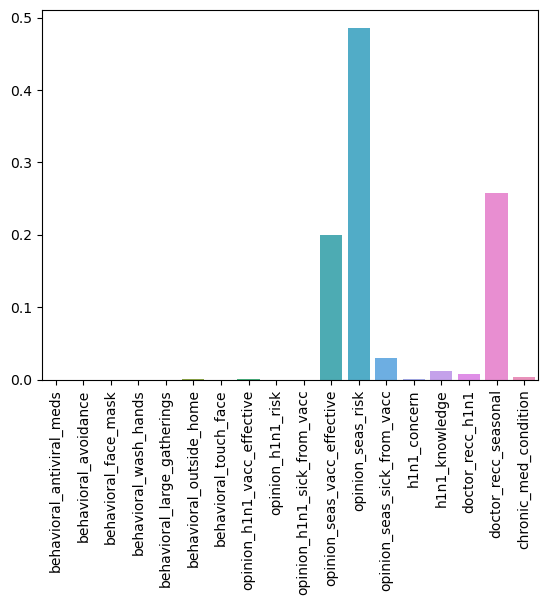

In [31]:
# Showing feature importances by the Decision Tree
sns.barplot(x = boe_dropped.columns[:-1], y = tree_clf.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

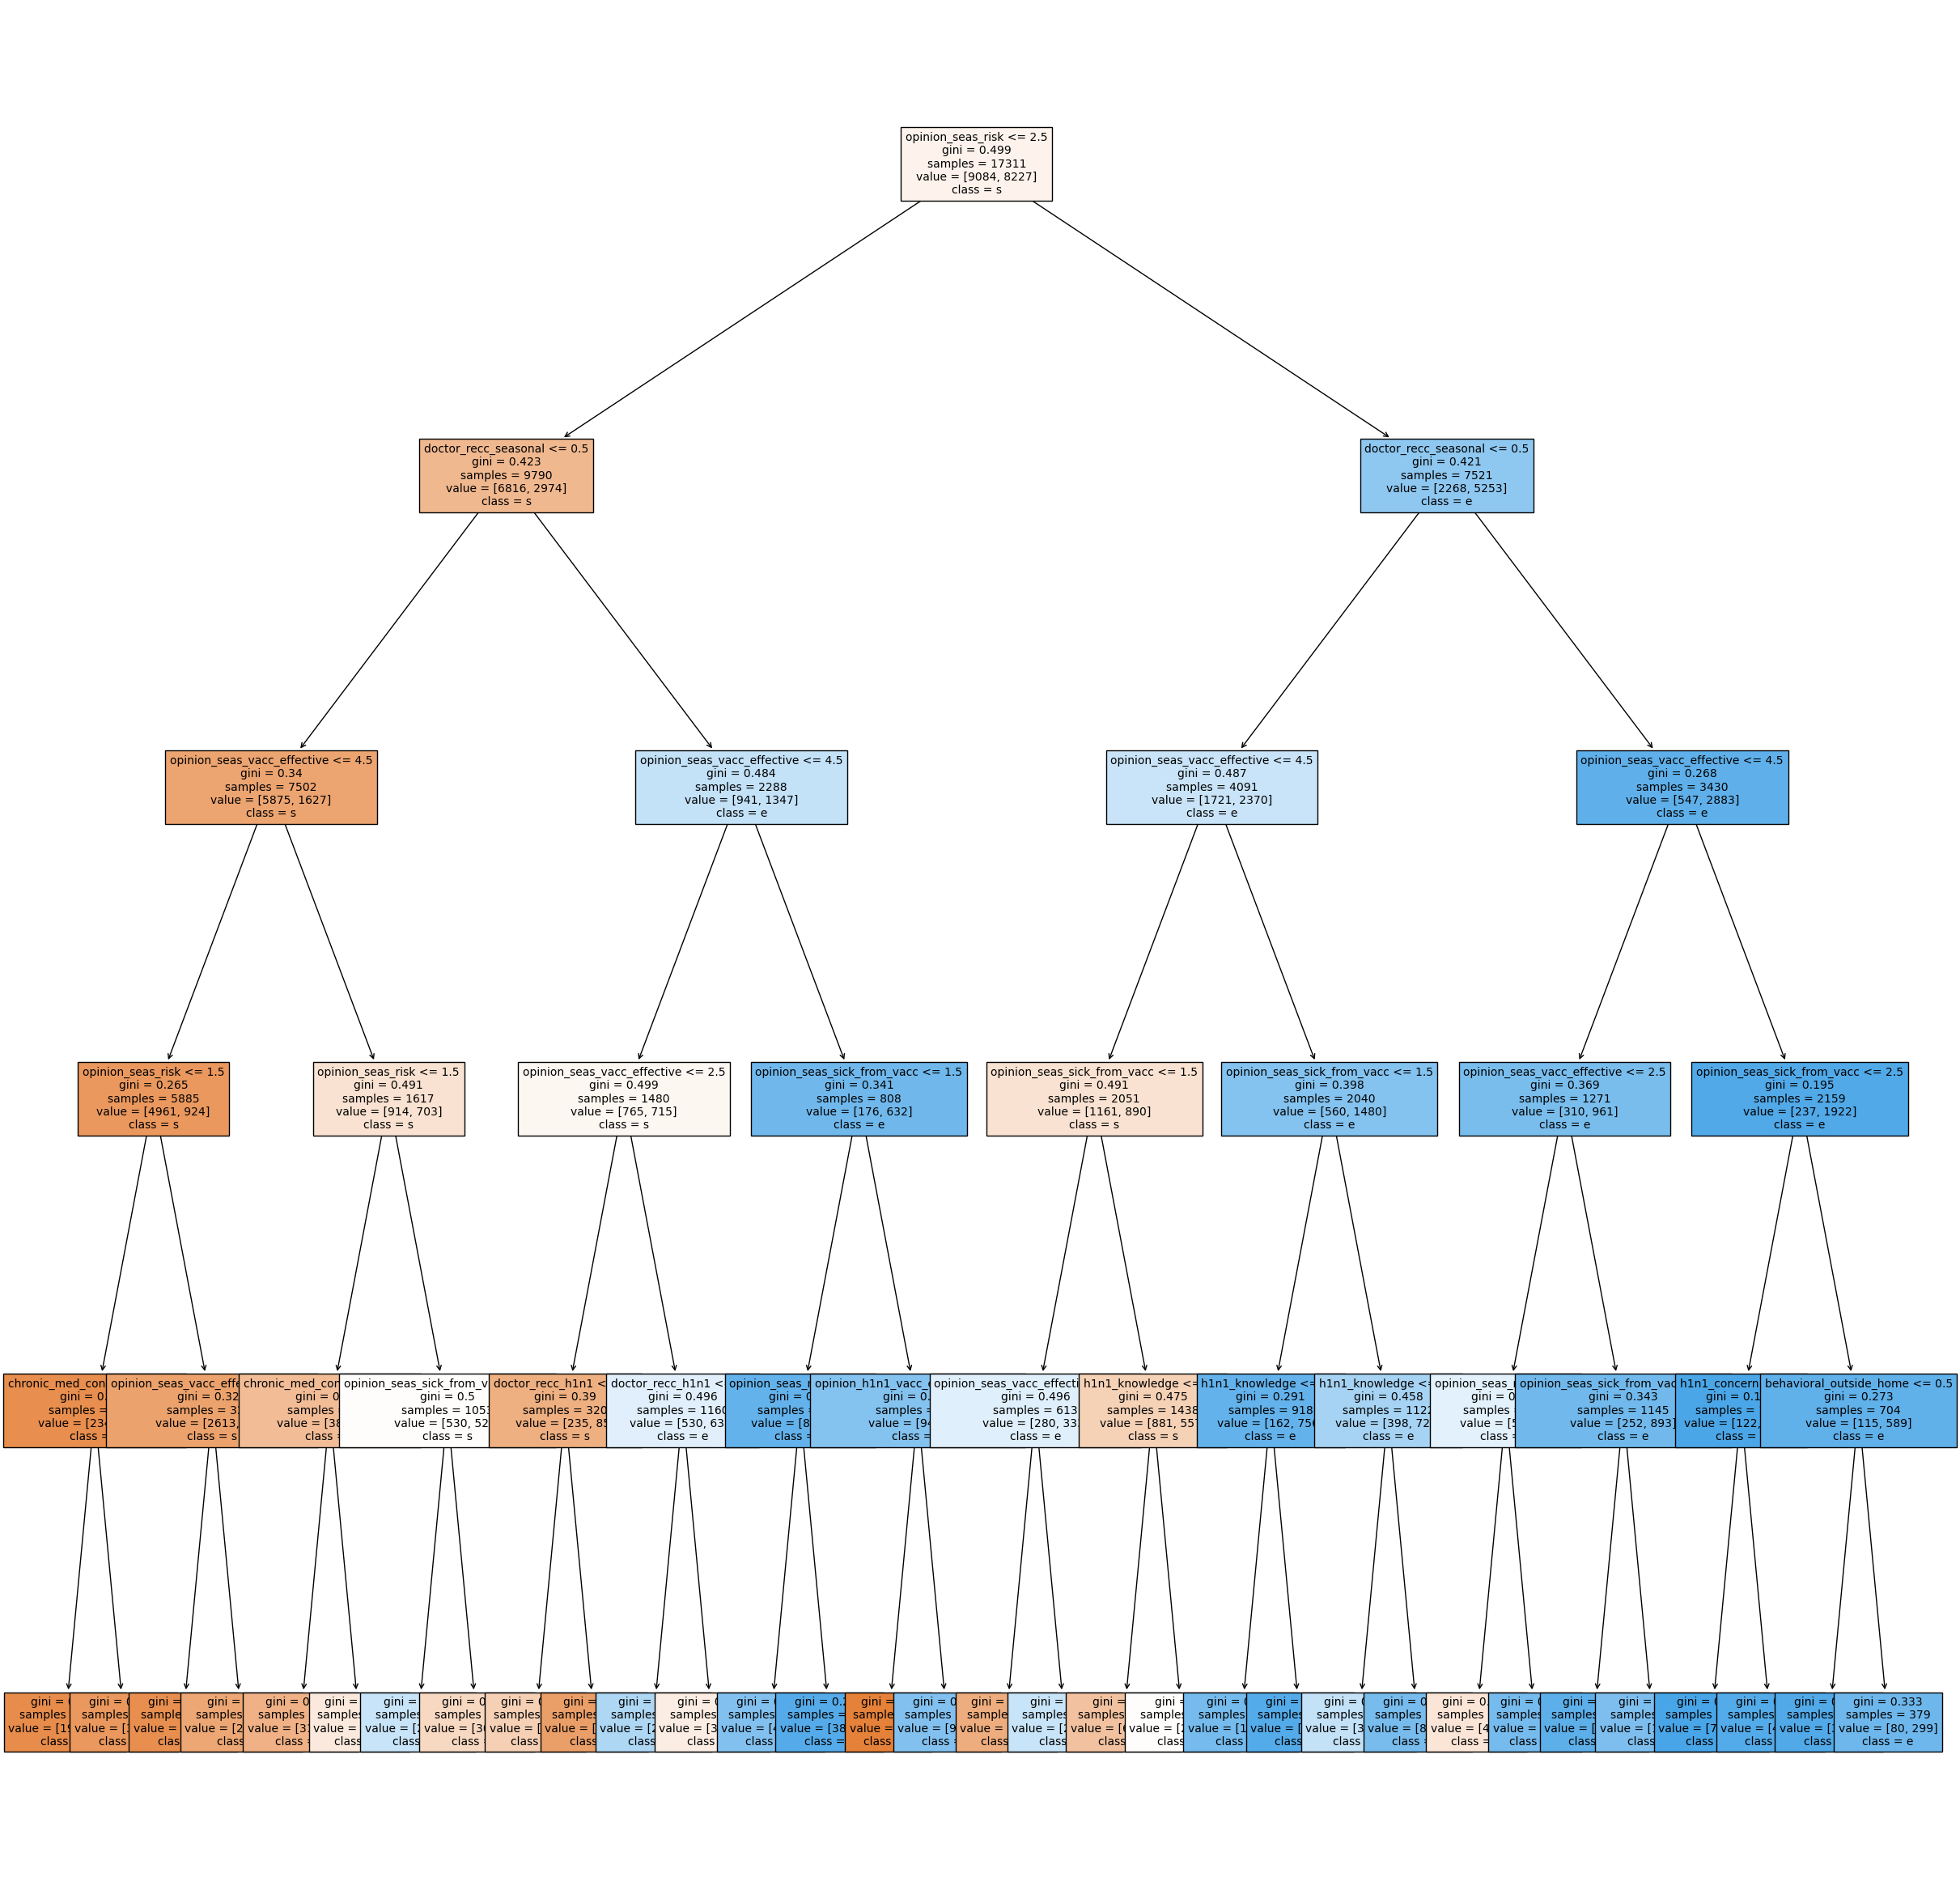

In [32]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (30,30))
plot_tree(tree_clf, feature_names = list(boe_dropped.columns[:-1]), class_names = list(boe_dropped.columns[-1]), filled = True, fontsize = 10 );

# features we want to focus

In [33]:
df.columns

Index(['h1n1_vaccine', 'seasonal_vaccine', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', '_merge'],
      dtype='object')

In [34]:
wf = ['doctor_recc_seasonal', 
      'opinion_seas_vacc_effective',
      'opinion_seas_risk',
      'opinion_seas_sick_from_vacc',
      'age_group',
      'education',
      'race',
      'sex',
      'income_poverty',
      'marital_status',
      'hhs_geo_region',
      'household_children',
      'seasonal_vaccine']
wf_df = df[wf]

In [35]:
wf_dropped = wf_df.dropna()

In [36]:
wf_dropped.columns

Index(['doctor_recc_seasonal', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'hhs_geo_region', 'household_children', 'seasonal_vaccine'],
      dtype='object')

In [37]:
wf_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20436 entries, 0 to 26706
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   doctor_recc_seasonal         20436 non-null  float64
 1   opinion_seas_vacc_effective  20436 non-null  float64
 2   opinion_seas_risk            20436 non-null  float64
 3   opinion_seas_sick_from_vacc  20436 non-null  float64
 4   age_group                    20436 non-null  object 
 5   education                    20436 non-null  object 
 6   race                         20436 non-null  object 
 7   sex                          20436 non-null  object 
 8   income_poverty               20436 non-null  object 
 9   marital_status               20436 non-null  object 
 10  hhs_geo_region               20436 non-null  object 
 11  household_children           20436 non-null  float64
 12  seasonal_vaccine             20436 non-null  int64  
dtypes: float64(5), int64(

# DecisionTreeClassifier with OrdinalEncoder

### OrdinalEncoder for a list we want to focus

In [38]:
X = wf_dropped.drop('seasonal_vaccine', axis =1)
y = wf_dropped['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#OrdinalEncoder
# Create an ordinal encoder instance
encoder = OrdinalEncoder()
# Fit and transform the data
X_tr_cd = encoder.fit_transform(X_train)
X_tt_cd = encoder.transform(X_test)
# Access the categories mapping
categories_mapping = {feature: encoder.categories_[i].tolist() for i, feature in enumerate(X_train.columns)}
# Display the mapping
print(categories_mapping)


# Instantiate DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 6, random_state = 42)

# Fit to train samples
tree_clf.fit(X_tr_cd, y_train)

# Predict using X_test
y_pred = tree_clf.predict(X_tt_cd)

# Evaluate the model by accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))

{'doctor_recc_seasonal': [0.0, 1.0], 'opinion_seas_vacc_effective': [1.0, 2.0, 3.0, 4.0, 5.0], 'opinion_seas_risk': [1.0, 2.0, 3.0, 4.0, 5.0], 'opinion_seas_sick_from_vacc': [1.0, 2.0, 3.0, 4.0, 5.0], 'age_group': ['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years'], 'education': ['12 Years', '< 12 Years', 'College Graduate', 'Some College'], 'race': ['Black', 'Hispanic', 'Other or Multiple', 'White'], 'sex': ['Female', 'Male'], 'income_poverty': ['<= $75,000, Above Poverty', '> $75,000', 'Below Poverty'], 'marital_status': ['Married', 'Not Married'], 'hhs_geo_region': ['atmpeygn', 'bhuqouqj', 'dqpwygqj', 'fpwskwrf', 'kbazzjca', 'lrircsnp', 'lzgpxyit', 'mlyzmhmf', 'oxchjgsf', 'qufhixun'], 'household_children': [0.0, 1.0, 2.0, 3.0]}
Accuracy: 75.72910550009787


In [39]:
wf_dropped.columns[:-1]

Index(['doctor_recc_seasonal', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'hhs_geo_region', 'household_children'],
      dtype='object')

In [40]:
tree_clf.feature_importances_

array([2.22250678e-01, 1.58514590e-01, 4.43232980e-01, 1.44357728e-02,
       1.21042179e-01, 1.62434485e-02, 6.22512514e-03, 7.14024307e-04,
       1.40074118e-02, 4.11519235e-04, 2.92227063e-03, 0.00000000e+00])

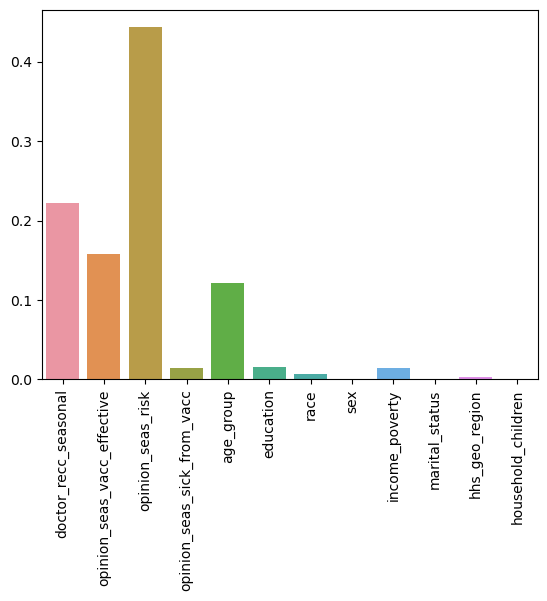

In [41]:
# Showing feature importances by the Decision Tree
sns.barplot(x = wf_dropped.columns[:-1], y = tree_clf.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

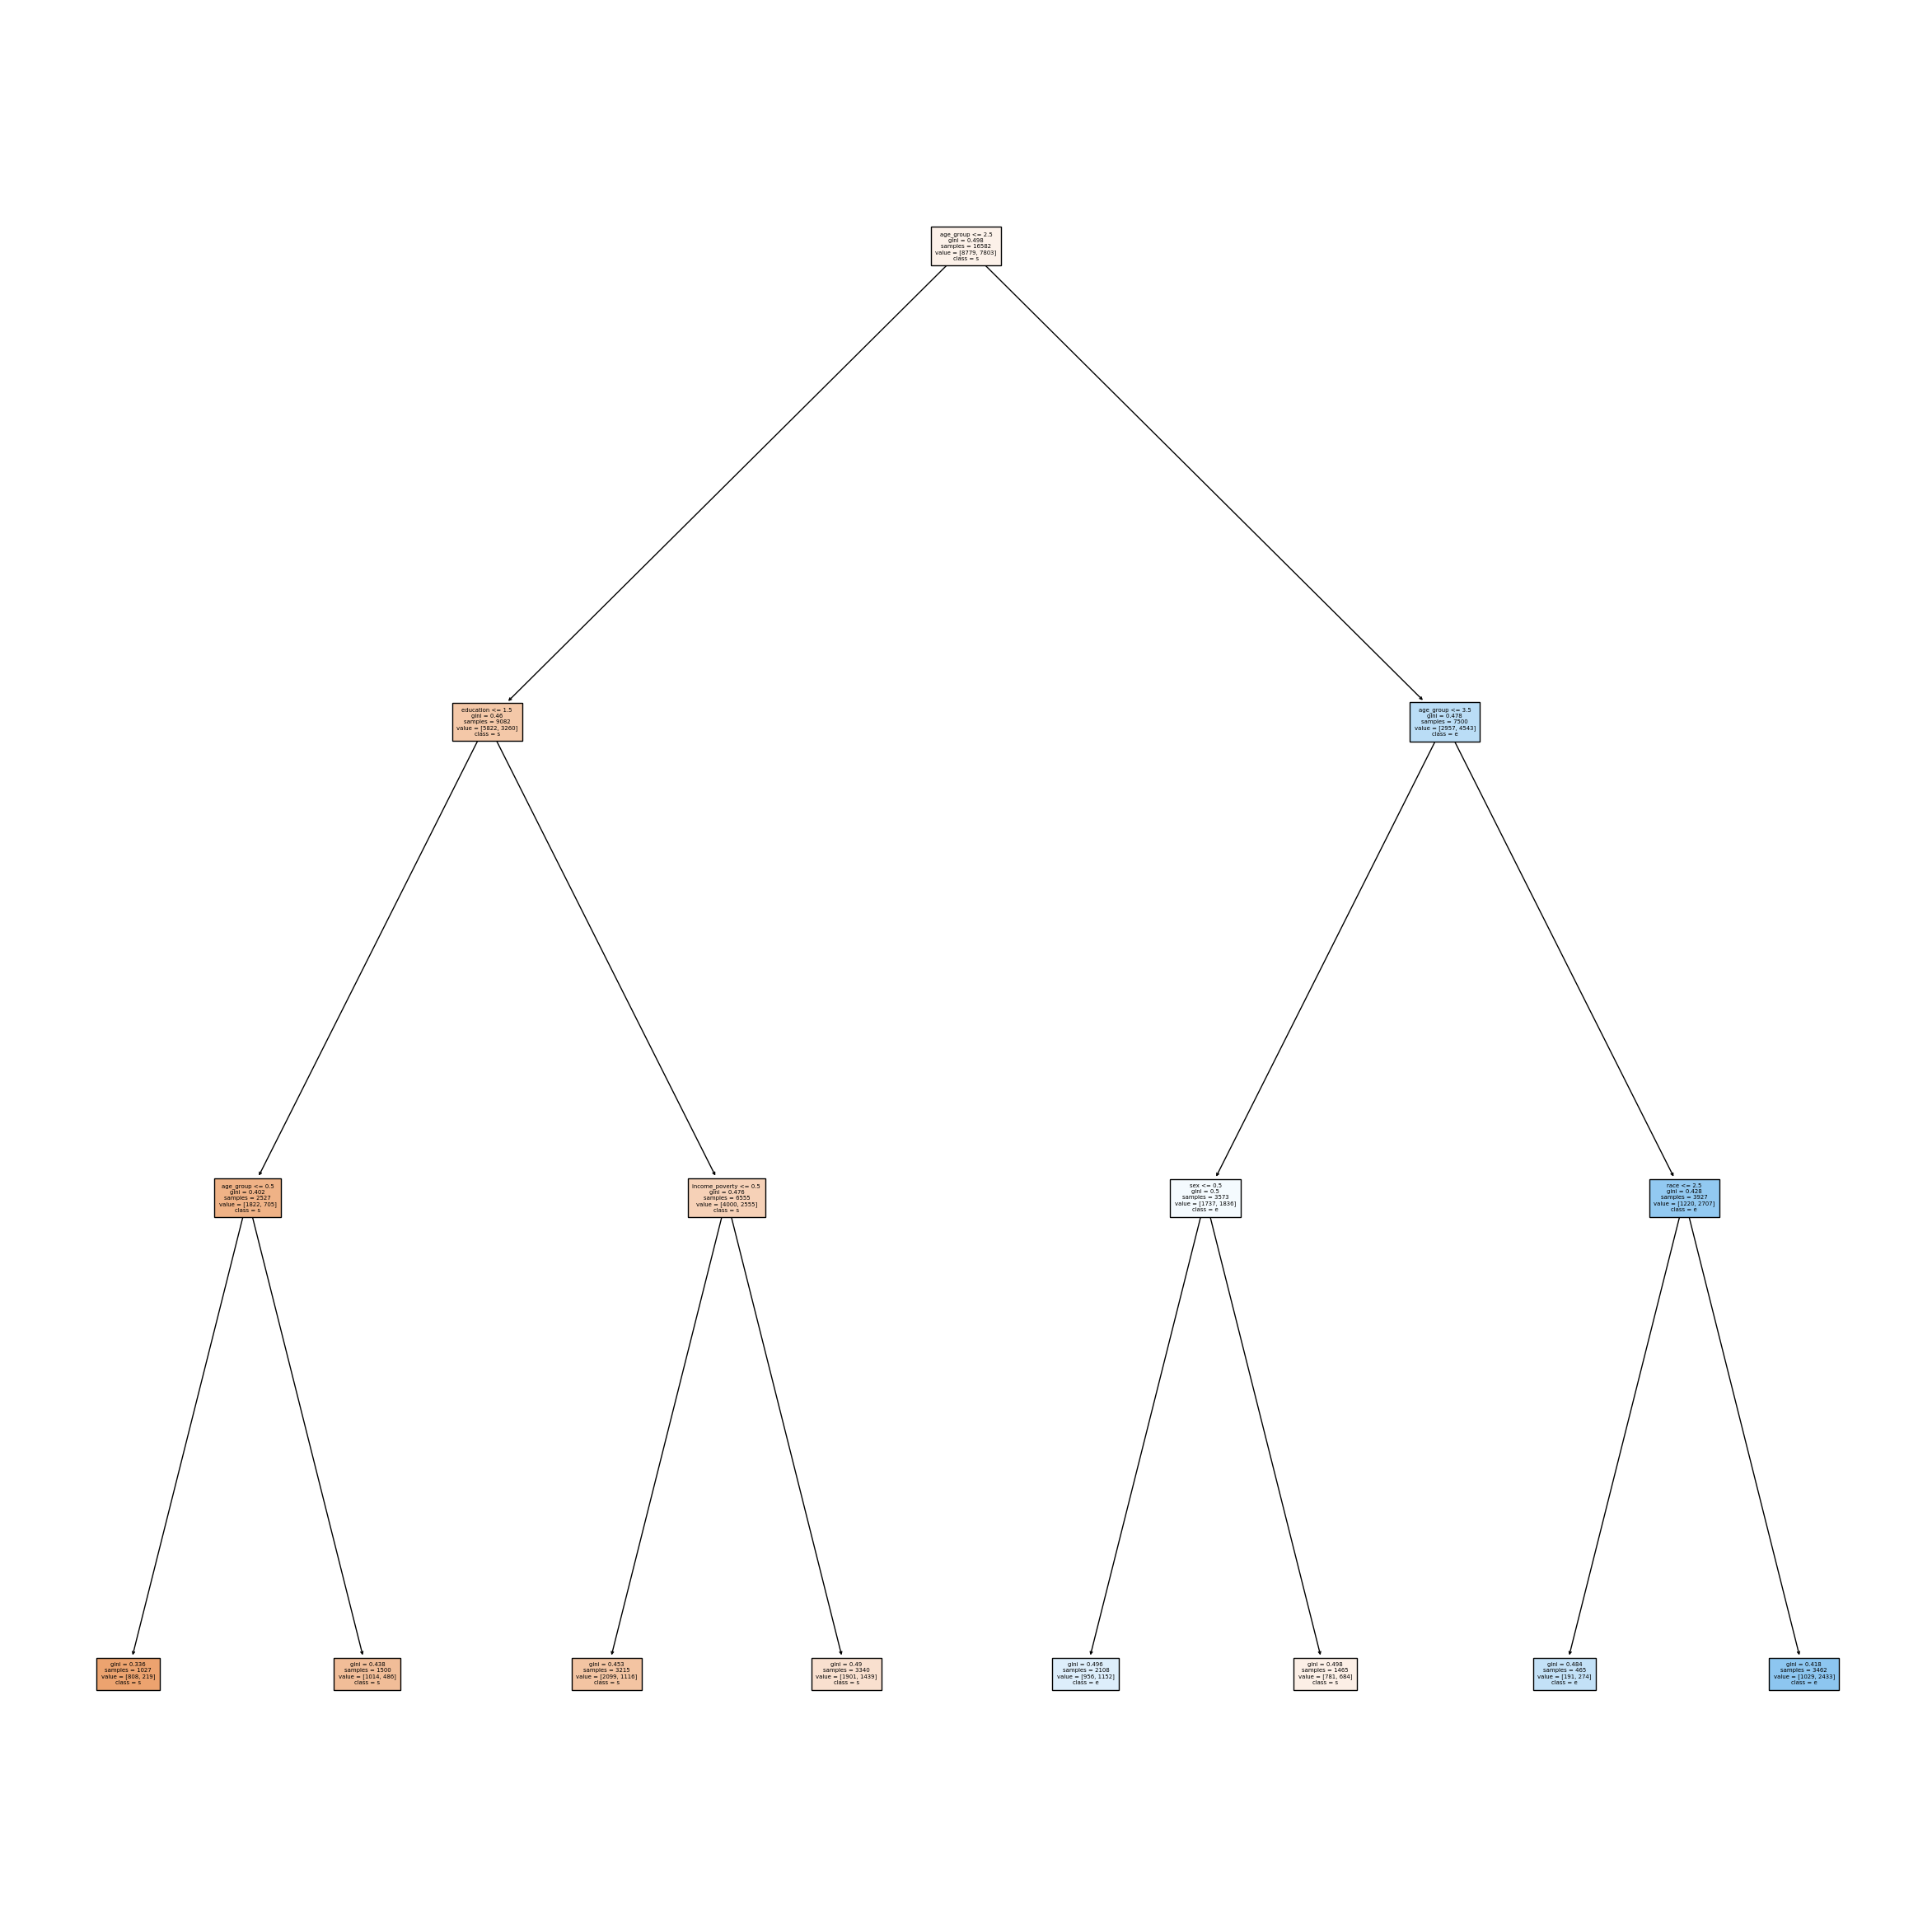

In [46]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (30,30))
plot_tree(tree_clf, 
          feature_names = list(wf_dropped.columns[:-1]), 
          class_names = list(wf_dropped.columns[-1]), 
          filled = True,
          fontsize = 5
         );

In [47]:
wf = ['age_group',
      'education',
      'race',
      'sex',
      'income_poverty',
      'marital_status',
      'hhs_geo_region',
      'household_children',
      'seasonal_vaccine']
wf_df = df[wf]

In [44]:
wf_dropped = wf_df.dropna()

In [45]:
X = wf_dropped.drop('seasonal_vaccine', axis =1)
y = wf_dropped['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#OrdinalEncoder
# Create an ordinal encoder instance
encoder = OrdinalEncoder()
# Fit and transform the data
X_tr_cd = encoder.fit_transform(X_train)
X_tt_cd = encoder.transform(X_test)
# Access the categories mapping
categories_mapping = {feature: encoder.categories_[i].tolist() for i, feature in enumerate(X_train.columns)}
# Display the mapping
print(categories_mapping)


# Instantiate DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)

# Fit to train samples
tree_clf.fit(X_tr_cd, y_train)

# Predict using X_test
y_pred = tree_clf.predict(X_tt_cd)

# Evaluate the model by accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))

{'age_group': ['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years'], 'education': ['12 Years', '< 12 Years', 'College Graduate', 'Some College'], 'race': ['Black', 'Hispanic', 'Other or Multiple', 'White'], 'sex': ['Female', 'Male'], 'income_poverty': ['<= $75,000, Above Poverty', '> $75,000', 'Below Poverty'], 'marital_status': ['Married', 'Not Married'], 'hhs_geo_region': ['atmpeygn', 'bhuqouqj', 'dqpwygqj', 'fpwskwrf', 'kbazzjca', 'lrircsnp', 'lzgpxyit', 'mlyzmhmf', 'oxchjgsf', 'qufhixun'], 'household_children': [0.0, 1.0, 2.0, 3.0]}
Accuracy: 62.21056439942113


In [ ]:
c = list(wf_dropped.columns[:-1])

In [ ]:
i = list(tree_clf.feature_importances_)

In [ ]:
ci = df = pd.DataFrame({'names': c, 'importance': i})

In [ ]:
ci

In [ ]:
ci.to_csv('feature_importance.csv', index=False)

In [ ]:
# Showing feature importances by the Decision Tree
sns.barplot(x = wf_dropped.columns[:-1], y = tree_clf.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (30,30))
plot_tree(tree_clf, feature_names = list(wf_dropped.columns[:-1]), class_names = list(wf_dropped.columns[-1]), filled = True );

In [ ]:
wf_dropped = wf_df.dropna()

In [ ]:
wf_dropped['age_group'].value_counts()

In [ ]:
age_cond = (wf_dropped['age_group'] == '18 - 34 Years') | (wf_dropped['age_group'] == '35 - 44 Years')

In [ ]:
wf_dropped = wf_dropped[age_cond]

In [ ]:
wf_dropped['age_group'].value_counts()

In [ ]:
wf_dropped.info()

In [ ]:
wf_dropped = wf_dropped.drop('age_group', axis =1)

In [ ]:
wf_dropped.info()

In [ ]:
X = wf_dropped.drop('seasonal_vaccine', axis =1)
y = wf_dropped['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#OrdinalEncoder
# Create an ordinal encoder instance
encoder = OrdinalEncoder()
# Fit and transform the data
X_tr_cd = encoder.fit_transform(X_train)
X_tt_cd = encoder.transform(X_test)
# Access the categories mapping
categories_mapping = {feature: encoder.categories_[i].tolist() for i, feature in enumerate(X_train.columns)}
# Display the mapping
print(categories_mapping)


# Instantiate DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)

# Fit to train samples
tree_clf.fit(X_tr_cd, y_train)

# Predict using X_test
y_pred = tree_clf.predict(X_tt_cd)

# Evaluate the model by accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))

In [ ]:
# Showing feature importances by the Decision Tree
sns.barplot(x = wf_dropped.columns[:-1], y = tree_clf.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (30,30))
plot_tree(tree_clf, feature_names = list(wf_dropped.columns[:-1]), class_names = list(wf_dropped.columns[-1]), filled = True );

In [ ]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (30,30))
plot_tree(tree_clf, 
          feature_names = list(feature_names_after_encoding), 
          class_names = list(feature_names_after_encoding), 
          filled = True );

In [ ]:
wf = ['age_group',
      'education',
      'race',
      'sex',
      'income_poverty',
      'marital_status',
      'hhs_geo_region',
      'household_children',
      'seasonal_vaccine']
wf_df = df[wf]

In [ ]:
wf_dropped = wf_df.dropna()

In [ ]:
wf_dropped['age_group'].value_counts()

In [ ]:
age_cond = (wf_dropped['age_group'] == '18 - 34 Years') | (wf_dropped['age_group'] == '35 - 44 Years')

In [ ]:
wf_dropped = wf_dropped[age_cond]

In [ ]:
wf_dropped['age_group'].value_counts()

In [ ]:
wf_dropped.info()

In [ ]:
wf_dropped = wf_dropped.drop('age_group', axis =1)

In [ ]:
wf_dropped.info()

In [ ]:
X = wf_dropped.drop('seasonal_vaccine', axis =1)
y = wf_dropped['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# OneHotEncoder
# Create an ordinal encoder instance
encoder = OneHotEncoder()
# Fit and transform the data
X_tr_cd = encoder.fit_transform(X_train)
X_tt_cd = encoder.transform(X_test)
# Access the categories mapping
categories_mapping = {feature: encoder.categories_[i].tolist() for i, feature in enumerate(X_train.columns)}
# Display the mapping
print(categories_mapping)

# Instantiate DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)

# Fit to train samples
tree_clf.fit(X_tr_cd, y_train)

# Predict using X_test
y_pred = tree_clf.predict(X_tt_cd)

# Assuming you have an instance of OneHotEncoder named onehot_encoder
feature_names_after_encoding = encoder.get_feature_names_out(input_features=wf_dropped.columns[:-1])
print(feature_names_after_encoding)

# Assuming you have an instance of DecisionTreeClassifier named tree_clf
feature_importances = tree_clf.feature_importances_
print(feature_importances)

# Evaluate the model by accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))



In [ ]:
# Showing feature importances by the Decision Tree
sns.set(style="whitegrid")
plt.figure(figsize=(12,12))
sns.barplot(x=feature_importances, y=feature_names_after_encoding)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (30,30))
plot_tree(tree_clf, 
          feature_names = list(feature_names_after_encoding), 
          class_names = list(feature_names_after_encoding), 
          filled = True );

In [ ]:
from sklearn.compose import ColumnTransformer


In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
ordinal_cols = ['age_group',
                'education',
                'income_poverty']

In [ ]:
nominal_cols = ['race',
                'sex',
                'marital_status',
                'hhs_geo_region']

In [ ]:
no_need_transform_cols = ['doctor_recc_seasonal', 
                          'opinion_seas_vacc_effective',
                          'opinion_seas_risk',
                          'opinion_seas_sick_from_vacc',
                          'household_children']

In [ ]:
wf = ['doctor_recc_seasonal', 
      'opinion_seas_vacc_effective',
      'opinion_seas_risk',
      'opinion_seas_sick_from_vacc',
      'age_group',
      'education',
      'race',
      'sex',
      'income_poverty',
      'marital_status',
      'hhs_geo_region',
      'household_children',
      'seasonal_vaccine']
wf_df = df[wf]

In [ ]:
wf_dropped = wf_df.dropna()

In [ ]:
# Create transformers
ordinal_transformer = OrdinalEncoder()
nominal_transformer = OneHotEncoder(sparse_output=False)

In [ ]:
# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_transformer, ordinal_cols),
        ('nominal', nominal_transformer, nominal_cols),
        ], remainder = 'passthrough')

# Create decision tree model
model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', model)])
# Assign X and y
X = wf_dropped.drop('seasonal_vaccine', axis =1)
y = wf_dropped['seasonal_vaccine']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

In [ ]:
# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_transformer, ordinal_cols),
        ('nominal', nominal_transformer, nominal_cols),
        ], remainder = 'passthrough')

# Create decision tree model
model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', model)])

# Assign X and y
X = wf_dropped.drop('seasonal_vaccine', axis =1)
y = wf_dropped['seasonal_vaccine']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)


# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

In [ ]:
# Get feature names after preprocessing
feature_names = ordinal_cols + list(preprocessor.named_transformers_['nominal']
                                    .get_feature_names_out(nominal_cols))
feature_names += no_need_transform_cols
len(feature_names)

In [ ]:
# Extract feature importances from the decision tree model
importances = pipeline.named_steps['classifier'].feature_importances_
len(importances)

In [ ]:
# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

In [ ]:
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
# Plot the feature importances
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (30,30))
plot_tree(tree_clf, 
          feature_names = list(feature_importance_df['Feature']), 
          class_names = list(feature_importance_df['Feature']), 
          filled = True );

# Analysis by Age, gender, education, income_poverty

In [60]:
vac_pct_or_ag = df.groupby(['opinion_seas_risk','age_group'])['seasonal_vaccine'].agg(np.mean)

In [61]:
vac_pct_or_ag = pd.DataFrame(vac_pct_or_ag)

In [62]:
vac_pct_or_ag_pv = vac_pct_or_ag.pivot_table(index = 'opinion_seas_risk', columns = 'age_group')
round(vac_pct_or_ag_pv * 100, 0)

seasonal_vaccine                                            \
age_group            18 - 34 Years 35 - 44 Years 45 - 54 Years 55 - 64 Years   
opinion_seas_risk                                                              
1.0                           12.0          12.0          12.0          19.0   
2.0                           22.0          25.0          30.0          41.0   
3.0                           16.0          38.0          42.0          53.0   
4.0                           42.0          56.0          65.0          74.0   
5.0                           55.0          69.0          74.0          82.0   

                             
age_group         65+ Years  
opinion_seas_risk            
1.0                    42.0  
2.0                    64.0  
3.0                    68.0  
4.0                    82.0  
5.0                    87.0

In [63]:
# order_ed = ['(seasonal_vaccine, < 12 Years)', '(seasonal_vaccine, 12 Years)', '(seasonal_vaccine, Some College)', '(seasonal_vaccine, College Graduate)']
vac_pct_or_ed = df.groupby(['opinion_seas_risk','education'])['seasonal_vaccine'].agg(np.mean)
vac_pct_or_ed = pd.DataFrame(vac_pct_or_ed)
vac_pct_or_ed_pv = vac_pct_or_ed.pivot_table(index = 'opinion_seas_risk', columns = 'education')
vac_pct_or_ed_pv = pd.DataFrame(vac_pct_or_ed_pv)
round(vac_pct_or_ed_pv.iloc[:,[1,0,3,2]]*100,0)


seasonal_vaccine                                       
education               < 12 Years 12 Years Some College College Graduate
opinion_seas_risk                                                        
1.0                           25.0     22.0         18.0             21.0
2.0                           34.0     35.0         36.0             40.0
3.0                           38.0     48.0         63.0             66.0
4.0                           51.0     64.0         65.0             72.0
5.0                           55.0     71.0         78.0             84.0

In [64]:
vac_pct_or_gd = df.groupby(['opinion_seas_risk','sex'])['seasonal_vaccine'].agg(np.mean)
vac_pct_or_gd = pd.DataFrame(vac_pct_or_gd)
vac_pct_or_gd_pv = vac_pct_or_gd.pivot_table(index = 'opinion_seas_risk', columns = 'sex')
round(vac_pct_or_gd_pv * 100, 0)

seasonal_vaccine      
sex                         Female  Male
opinion_seas_risk                       
1.0                           23.0  19.0
2.0                           39.0  35.0
3.0                           58.0  53.0
4.0                           68.0  64.0
5.0                           77.0  69.0

In [65]:
vac_pct_or_ic = df.groupby(['opinion_seas_risk','income_poverty'])['seasonal_vaccine'].agg(np.mean)
vac_pct_or_ic = pd.DataFrame(vac_pct_or_ic)
vac_pct_or_ic_pv = vac_pct_or_ic.pivot_table(index = 'opinion_seas_risk', columns = 'income_poverty')
round(vac_pct_or_ic_pv.iloc[:,[2,0,1]] * 100, 0)

seasonal_vaccine                                    
income_poverty       Below Poverty <= $75,000, Above Poverty > $75,000
opinion_seas_risk                                                     
1.0                           21.0                      21.0      18.0
2.0                           28.0                      38.0      37.0
3.0                           40.0                      58.0      65.0
4.0                           46.0                      67.0      72.0
5.0                           56.0                      77.0      86.0